##**Problem Statement**

In [6]:
# We will use RNN (particularly LSTM) to predict stock price of a company .i.e Apple
# Data collected from https://finance.yahoo.com/quote/AAPL/
# 5 years of data collected from 2012-12-31 to 2017-12-31
# Using the RNN model we will predict the prices for the month of January in 2018
# since we have data till 2017.
# We have saved this 5 years data in apple_training.csv (train data) in google drive
# To compare the predicted price we need original data for comparison.
# We have collected Janaury first month data and saved in apple_testing.csv (test data) 
# in google drive. 
# Stock market was closed on 10 days in Janauary, so we have only 20 days data.
# We will make prediction for 20 days for Janaury

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
## To access data , we need to mount google drive at colab.
## Initially the steps were longer for mounting drive but now product has be come stable.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
os.getcwd() ## need  to know current workig directory

'/content'

In [11]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/Season-13/Day 6')

## We can either write os.chdir('/content/drive/MyDrive/Forsk_Dataset')

In [12]:
apple_training_complete = pd.read_csv('apple_training.csv')  

In [13]:
apple_training_complete.shape  ## 1260 records and 7 columnms there.

(1260, 7)

In [15]:
apple_training_complete.head()  ## First 5 records

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,53.974899,164873100
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,55.684914,140129500
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,54.982059,88241300
3,2013-01-04,76.709999,76.947144,75.118568,75.285713,53.450539,148583400
4,2013-01-07,74.571426,75.614288,73.599998,74.842857,53.136124,121039100


In [16]:
## Expanation of columns
# Date - Date of the trading
# Open - Stock price opened at this price
# High - Stock went upto this price
# Low - Stock went down to this price
# Close - Stock finally closed on this price. Close price adjusted for split
# Adj Close - Price ajusted for splits and dividend and/or capital gain distributions.
# Volume - How many stock were sold during the day


## In this data what we want to predict
# We want to predict open price for January 2018 (20 predictions, since stock
# worked for only 20 days)
# We can predict open others also High Low close Adj close  volume etc.

## How the prediction will work?
# For that we need to understand concept Time Series Analysis
# We will include only Open column and exclude other columns data


In [17]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values   

In [18]:
## Explanation of codes
# only Open column selected
# apple_training_processed is name of object 
# We can also iloc[:,1] but this will give data in one dimension
# but we want 2 dimenion data

In [19]:
apple_training_processed 

array([[ 72.932854],
       [ 79.117142],
       [ 78.26857 ],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

In [20]:
apple_training_processed.shape

(1260, 1)

In [21]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)  

In [22]:
## apple_training_scaled is object name

In [23]:
apple_training_scaled  ## Converted to range of 0 and 1

array([[0.14628787],
       [0.19795893],
       [0.19086893],
       ...,
       [0.95814041],
       [0.96566005],
       [0.96164958]])

In [24]:
apple_training_scaled.shape ## 1 columns since considered open price

(1260, 1)

In [25]:
## Now we have to convert this time series data and generate features and label
## from apple_training_scaled
## for that written below code.

In [26]:
features_set = []  
labels = []  
for i in range(60, 1260):  
    features_set.append(apple_training_scaled[i-60:i,0])
    labels.append(apple_training_scaled[i, 0])

In [27]:
## Exlaplanation of codes

#features_set = [] ## we have two variables which are empty feature and label   
#labels = []  
#for i in range(60, 1260):  -- We have taken window/look back of 60, start from 60 and 
#--go to 1259, [1260 will be excluded]
# --first 0-59 work as feature and 60th value will be label. then loop will index to 61 
# -- as label and then 1-60 will be feature and goes on

#    features_set.append(apple_training_scaled[i-60:i,0]) --
#--[i-60:i,0] -- - i-60 to i is row selection and 0 is column (anyways we have taken one column)
#---that means we are picking 0 to 59 in feature and appending to feature
# -- then taking feature to 1 to 60 as feature (2nd iteration) [61 excluded though written in code]

#    labels.append(apple_training_scaled[i, 0]) 
# -- Picking only 60th value for label and appending to label
# -- then taking label as 61st value (2nd iteration)


In [28]:
features_set ## lot of rows are generated and every row has 60 columns since look back 60

[array([0.14628787, 0.19795893, 0.19086893, 0.17784673, 0.15997849,
        0.16858435, 0.16057534, 0.16779659, 0.15878493, 0.13691814,
        0.13169014, 0.12732155, 0.1460253 , 0.13195271, 0.1391621 ,
        0.14423488, 0.08597518, 0.07605635, 0.059513  , 0.08418477,
        0.08239435, 0.08237052, 0.08491287, 0.07870612, 0.06693722,
        0.08176175, 0.0898544 , 0.10268561, 0.10566959, 0.10926234,
        0.09458105, 0.09137026, 0.09653853, 0.08728814, 0.08321794,
        0.06926475, 0.07314397, 0.07863453, 0.0666627 , 0.07216522,
        0.06693722, 0.05971593, 0.04754117, 0.03999762, 0.05555025,
        0.04360229, 0.0499284 , 0.0498687 , 0.05685129, 0.04831701,
        0.05354501, 0.05963236, 0.06383384, 0.08537839, 0.08289565,
        0.07430177, 0.07950586, 0.09157316, 0.0924684 , 0.08174982]),
 array([0.19795893, 0.19086893, 0.17784673, 0.15997849, 0.16858435,
        0.16057534, 0.16779659, 0.15878493, 0.13691814, 0.13169014,
        0.12732155, 0.1460253 , 0.13195271, 0.

In [29]:
# 60 columns in first row and for below arrays
#array([0.14628787, 0.19795893, 0.19086893, 0.17784673, 0.15997849,
#        0.16858435, 0.16057534, 0.16779659, 0.15878493, 0.13691814,
#        0.13169014, 0.12732155, 0.1460253 , 0.13195271, 0.1391621 ,
#        0.14423488, 0.08597518, 0.07605635, 0.059513  , 0.08418477,
#        0.08239435, 0.08237052, 0.08491287, 0.07870612, 0.06693722,
#        0.08176175, 0.0898544 , 0.10268561, 0.10566959, 0.10926234,
#        0.09458105, 0.09137026, 0.09653853, 0.08728814, 0.08321794,
#        0.06926475, 0.07314397, 0.07863453, 0.0666627 , 0.07216522,
#        0.06693722, 0.05971593, 0.04754117, 0.03999762, 0.05555025,
#        0.04360229, 0.0499284 , 0.0498687 , 0.05685129, 0.04831701,
#        0.05354501, 0.05963236, 0.06383384, 0.08537839, 0.08289565,
#        0.07430177, 0.07950586, 0.09157316, 0.0924684 , 0.08174982]),

In [30]:
## Only 1 column for labels but in features it was 60 columns. 
## but no. of rows should be same for both feature an dlable

[0.0738243156253025,
 0.06437096524008729,
 0.04730243705357823,
 0.05180234750655083,
 0.05465504383710279,
 0.04360228787537429,
 0.04402004031976575,
 0.04582240244794461,
 0.04789925848711346,
 0.05460729377770773,
 0.05512053798567357,
 0.046586294780459,
 0.04010502840710778,
 0.03855333946912548,
 0.020315097754147193,
 0.0,
 0.00557410715221951,
 0.01912149666315649,
 0.006648370693194294,
 0.027763187946030166,
 0.026068265540294455,
 0.03876819384836355,
 0.056254474479264294,
 0.06742659305665671,
 0.06422772341711785,
 0.07560274841487974,
 0.08085458653106598,
 0.09190737591365844,
 0.08482929646198795,
 0.08574837022112453,
 0.08355215992150772,
 0.07584147364620747,
 0.07863453044500762,
 0.061100508109927676,
 0.042098340641571086,
 0.06096919753539515,
 0.05244686886818534,
 0.05989495906006831,
 0.06693721970078054,
 0.057269040001975136,
 0.06311769955169672,
 0.07391980738887677,
 0.0621031256737698,
 0.06884699648575437,
 0.07702317690962529,
 0.0749104686386341,
 

In [31]:
len(features_set)

1200

In [32]:
type(features_set) ## is in list format , we need to convert in nd array format 
## to get shape

list

In [33]:
features_set, labels = np.array(features_set), np.array(labels)  


In [81]:
type(features_set)

numpy.ndarray

In [34]:
features_set.shape ## 1200 rows and 60 column

(1200, 60)

In [35]:
labels.shape  ## 1200 rows  

(1200,)

In [36]:
## Why 1200 rows ?
# Since in total we had 1260 rowas.
# We started from 60  

In [37]:
## features_set.shape is (1200, 60) - 2 dimension
## to feed this data into RNN model 
## We ne3d to reshape features_set to 3 dimesnion.
## every feature has one value , so depth will be 1.
## In that case dimension should be (1200, 60, 1)


In [38]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  


In [39]:
## features_set.shape[0] = 1200
## features_set.shape[1] = 60

In [40]:
features_set.shape

(1200, 60, 1)

In [41]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout

In [42]:
model = Sequential()

In [43]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  


In [44]:
## Expalnation of codes
# Creating first LSTM layer
# units=50 - We are adding first LSTM model with 50 units
# input_shape=(features_set.shape[1], 1) -We have to specify no of columns and depth
# --rows not required,  features_set.shape[1] = 60 
# -- So input shape is 60,1

In [45]:
model.add(Dropout(0.2))  


In [46]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [47]:
## Till now we have added only LSTM layer  (RNN)
## After RNN we again have to go with ANN (just like CNN)
## This model has now become regression problem
## Now we should have 1 node in output node and no a/f required in output layes

## Dropout is a mechanism in Deep learning to avoid overfitting
# Overfitting where trainig score is betteror very high and test score is poor or low

In [48]:
model.add(Dense(units = 1)) 


In [49]:
## Expanation of codes.
## model.add(Dense(units = 1))
#  ANN where we have added one output layer with 
# one node and no  activation function
# No hidden layer added 
# 

In [50]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


In [51]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)  


Epoch 1/100
38/38 [==============================] - 13s 16ms/step - loss: 0.0303
Epoch 2/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0056
Epoch 3/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0044
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0047
Epoch 5/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0040
Epoch 8/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0038
Epoch 9/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0036
Epoch 10/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0035
Epoch 11/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0040
Epoch 13/100
38/38 [====

In [52]:
## Now we want to predict opening price for January 
## 20 predictions and compare with original data

# Testing the LSTM

In [53]:
apple_testing_complete = pd.read_csv('apple_testing.csv')  
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values  

In [54]:
apple_testing_complete.shape

(20, 7)

In [55]:
apple_testing_processed.shape

(20, 1)

Converting test data into right format
For each day of January 2018, we want our feature set to contain the opening stock prices for the previous 60 days. For the 1st of January, we need the stock prices for the previous 60 days. To do so, we need to concatenate our training data and test data before preprocessing

In [56]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)


In [57]:
apple_total.shape

(1280,)

Now let's prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days. That means we need opening stock prices for the 20 test days for the month of January 2018 and the 60 stock prices from the last 60 days for the training set.

In [58]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values 

In [59]:
test_inputs.shape

(80,)

Scale our test data as we did in train data

In [60]:
test_inputs = test_inputs.reshape(-1,1) 

In [61]:
test_inputs.shape

(80, 1)

In [62]:
## We will use scaler object for scaling test_inputs
## used for min max scaling in train data previously


In [63]:
test_inputs = scaler.transform(test_inputs)  

In [64]:
test_inputs[0]

array([0.82512526])

In [65]:
test_inputs

array([[0.82512526],
       [0.83172595],
       [0.83874431],
       [0.84083311],
       [0.84008117],
       [0.84325619],
       [0.84643109],
       [0.85620667],
       [0.87191452],
       [0.87726185],
       [0.84659823],
       [0.8454285 ],
       [0.84776795],
       [0.84275477],
       [0.84793509],
       [0.8506087 ],
       [0.86782042],
       [0.90625446],
       [0.93975883],
       [0.95621862],
       [0.92889715],
       [0.9907257 ],
       [0.97710666],
       [0.98997377],
       [0.99624018],
       [1.        ],
       [1.        ],
       [0.98654809],
       [0.98270464],
       [0.95705419],
       [0.96716393],
       [0.9659942 ],
       [0.95972779],
       [0.9638219 ],
       [0.98537837],
       [0.99991649],
       [0.9994987 ],
       [0.99323229],
       [0.9792791 ],
       [0.96089752],
       [0.95688705],
       [0.97802574],
       [0.94945092],
       [0.9364168 ],
       [0.94920027],
       [0.96139894],
       [0.95062064],
       [0.975

In [66]:
## Now we want to extract features from test_inputs

In [67]:
test_features = []  
for i in range(60, 80):  
    test_features.append(test_inputs[i-60:i, 0])


In [68]:
## Expalanation of codes
# test_features = []  ## We are picking only feature
# for i in range(60, 80):  ## This time only we have 80 entries so starting from 60 
# -- and ending in 80 
#    test_features.append(test_inputs[i-60:i, 0])  ## We don't need label, since
# we need to predict label using test and we also have orignal label with us


In [69]:
test_features = np.array(test_features) 

In [70]:
test_features.shape 

(20, 60)

In [71]:
## Now we have 20 rows and 60 columns
## Now I will feed this data, and that will give me 20 prediction
## 1 prediction is coresponding to one row

In [72]:
 ## reshaping into three dimension , so that I add one depth part
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  

In [73]:
test_features.shape

(20, 60, 1)

In [74]:
predictions = model.predict(test_features)  

1/1 [==============================] - 1s 1s/step


In [75]:
predictions ## Predictions in range of 0 to 1

array([[0.94568443],
       [0.94457793],
       [0.9487306 ],
       [0.9554291 ],
       [0.9624944 ],
       [0.96894467],
       [0.9736258 ],
       [0.9737408 ],
       [0.97286975],
       [0.9753498 ],
       [0.98311746],
       [0.989676  ],
       [0.9974543 ],
       [1.0037847 ],
       [1.0050731 ],
       [1.0025046 ],
       [0.9988934 ],
       [0.99206233],
       [0.98049736],
       [0.9657471 ]], dtype=float32)

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values. To do so, we can use the ìnverse_transform method of the scaler object we created during training.

In [76]:
predictions = scaler.inverse_transform(predictions) ## After inverse transform we get prediction in original range

In [77]:
predictions

array([[168.60919],
       [168.47676],
       [168.97379],
       [169.7755 ],
       [170.62111],
       [171.39311],
       [171.95338],
       [171.96715],
       [171.8629 ],
       [172.15971],
       [173.0894 ],
       [173.87436],
       [174.80531],
       [175.56296],
       [175.71716],
       [175.40976],
       [174.97755],
       [174.15997],
       [172.7758 ],
       [171.01042]], dtype=float32)

In [78]:
## Comparing Actual and Predicted Price
#- Predicted price is almost similar to actual price 

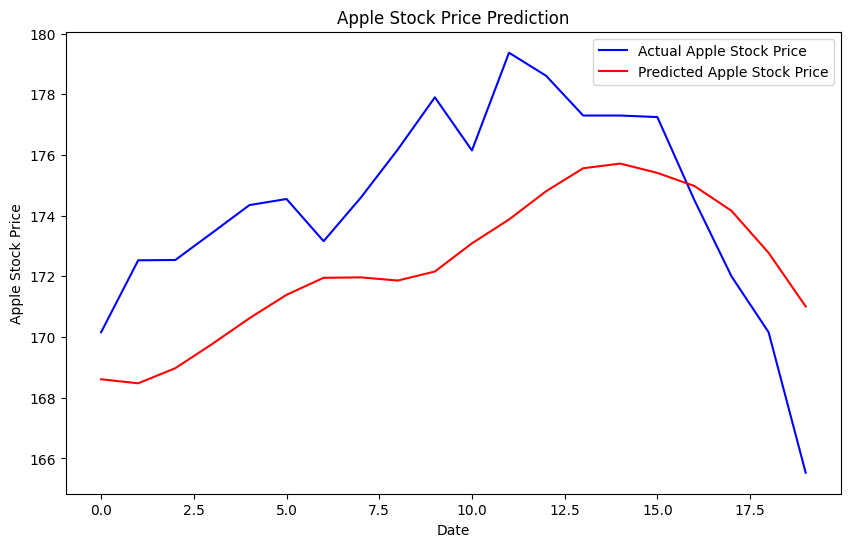

In [79]:
plt.figure(figsize=(10,6))  
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()  

Conclusion
A long short-term memory network (LSTM) is one of the most commonly used neural networks for time series analysis. The ability of LSTM to remember previous information makes it ideal for such tasks. In this article, we saw how we can use LSTM for the Apple stock price prediction.